In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-ticks')
params = {'legend.fontsize': 20, 'figure.figsize': (15, 10), 'lines.linewidth' : 3,
          'axes.labelsize': 20, 'axes.titlesize': 30, 
          'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(params)


##Упражнение 1
На одном графике изобразите время затраченное на вычисление с использованием массивов numpy и стандартных списков в питоне.
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте.

- Используйте функцию z = 2*x**2 + 4*y
- Перемножение матриц размера n на n

In [2]:
def python_linear(X, Y):
  for trial in range(10):
    trials = []
    start = time.time()
    Z = [2 * X[i]**2 + 4 * Y[i] for i in range(len(X))]
    trials.append(time.time() - start)
  return np.mean(trials)

def numpy_linear(X, Y):
  for trial in range(10):
    trials = []
    start = time.time()
    Z = 2 * X**2 + 4 * Y
    trials.append(time.time() - start)
  return np.mean(trials)

In [3]:
def python_matrix_multiplication(X, Y):
  for trial in range(10):
    trials = []
    start = time.time()

    rows_X = len(X)
    cols_X = len(X[0])
    rows_Y = len(Y)
    cols_Y = len(Y[0])

    if cols_X != rows_Y:
      return

    Z = [[0 for row in range(cols_Y)] for col in range(rows_X)]

    for i in range(rows_X):
        for j in range(cols_Y):
            for k in range(cols_X):
                Z[i][j] += X[i][k] * Y[k][j]
    
    trials.append(time.time() - start)
  return np.mean(trials)

def numpy_matrix_multiplication(X, Y):
  for trial in range(10):
    trials = []
    start = time.time()
    Z = np.dot(X, Y)
    trials.append(time.time() - start)
  return np.mean(trials)

In [32]:
python_linear_results = []
numpy_linear_results = []
python_matrix_multiplication_results = []
numpy_matrix_multiplication_results = []
vec_sizes = np.arange(10000, 50001, 5000)
for size_of_vec in vec_sizes:
  X = np.random.random(size_of_vec)
  Y = np.random.random(size_of_vec)
  python_linear_results.append(python_linear(X, Y))
  numpy_linear_results.append(numpy_linear(X, Y))
  X = np.random.random((size_of_vec//1000, size_of_vec//1000))
  Y = np.random.random((size_of_vec//1000, size_of_vec//1000))
  python_matrix_multiplication_results.append(python_matrix_multiplication(X, Y))
  numpy_matrix_multiplication_results.append(numpy_matrix_multiplication(X, Y))

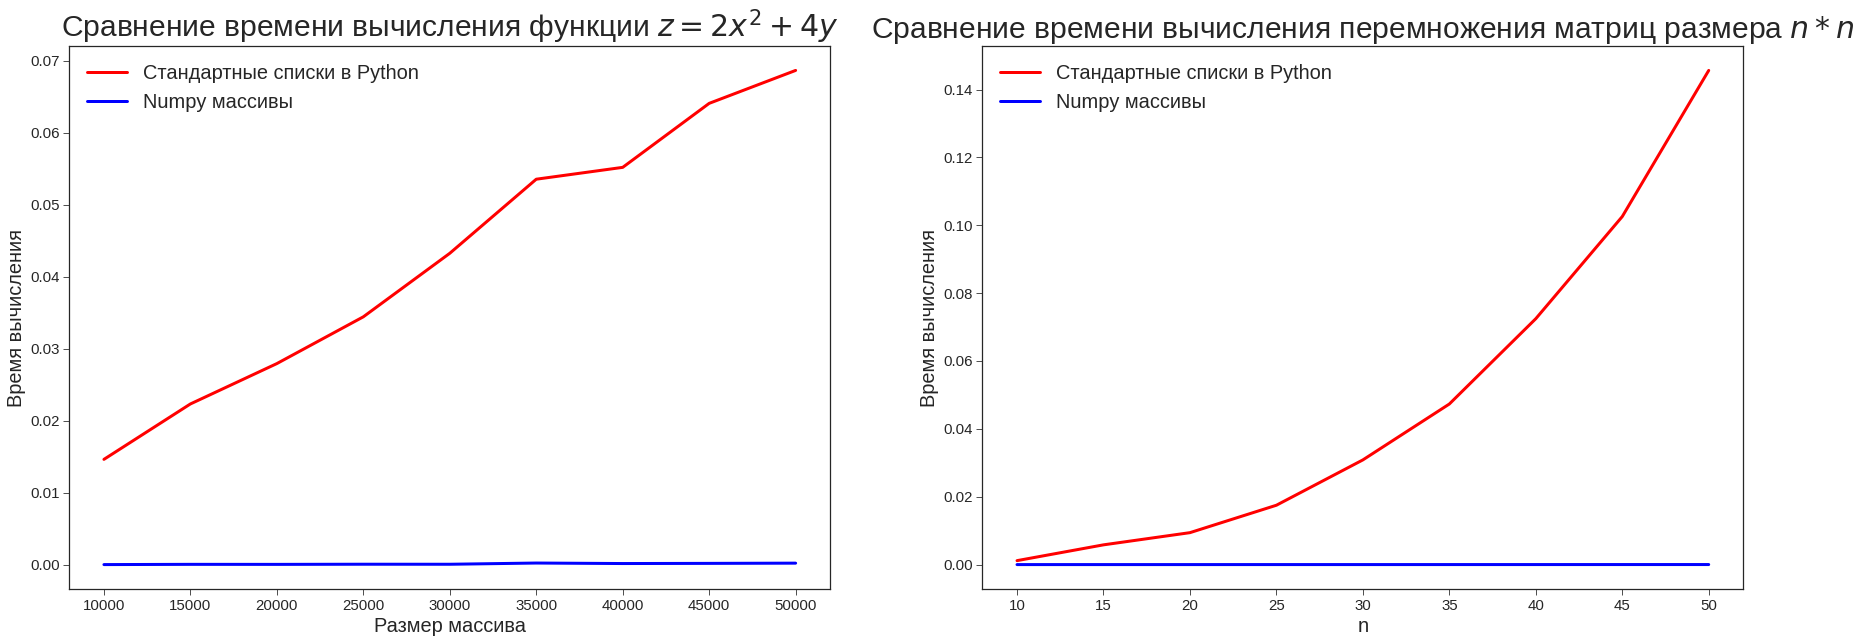

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(30,10))
axes[0].plot(vec_sizes, python_linear_results, 'r', label=r'Стандартные списки в Python')
axes[0].plot(vec_sizes, numpy_linear_results, 'b', label=r'Numpy массивы')
axes[0].legend()
axes[0].set_xlabel('Размер массива')
axes[0].set_ylabel('Время вычисления')
axes[0].set_title(r'Сравнение времени вычисления функции $z = 2x^2 + 4y$')

axes[1].plot(vec_sizes//1000, python_matrix_multiplication_results, 'r', label=r'Стандартные списки в Python')
axes[1].plot(vec_sizes//1000, numpy_matrix_multiplication_results, 'b', label=r'Numpy массивы')
axes[1].legend()
axes[1].set_xlabel('n')
axes[1].set_ylabel('Время вычисления')
axes[1].set_title(r'Сравнение времени вычисления перемножения матриц размера $n * n$')
plt.show()


##Упражнение 2
- Создайте массив чисел от 2 до 75. Выведите только нечётные.
- Присвойте нечётным числам этого массива значение -1.

In [10]:
arr = np.arange(2, 76)
arr[1::2]

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73, 75])

In [5]:
arr[np.where(arr % 2 == 1)] = -1
arr

array([ 2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1, 18,
       -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, -1, 34, -1,
       36, -1, 38, -1, 40, -1, 42, -1, 44, -1, 46, -1, 48, -1, 50, -1, 52,
       -1, 54, -1, 56, -1, 58, -1, 60, -1, 62, -1, 64, -1, 66, -1, 68, -1,
       70, -1, 72, -1, 74, -1])


##Упражнение 3
- Найдите в документации функцию, которая удаляет из одного массива элементы, которые есть в другом.
- Приведите примеры использования.

In [6]:
# numpy.setdiff1d(ar1, ar2, assume_unique=False)
# Find the set difference of two arrays.
# Return the unique values in ar1 that are not in ar2.

ar1 = np.arange(100)
ar2 = np.arange(0, 100, 2)
np.setdiff1d(ar1, ar2, assume_unique=False)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

##Упражнение 4
- Создайте случайную квадратную матрицу случайного размера от 10 до 100.
- Найдите максимум и сумму элементов.
- Поделите каждый элемент матрицы на максимум.
- Отнимите от каждой строки матрицы среднее по строке.
- Замените максимальное значение на -1.

In [2]:
size = np.random.randint(10, 101)
arr = np.random.random((size, size))
arr_max = arr.max()
arr_sum = arr.sum()
arr = arr / arr_max
arr -= arr.mean(axis=1, keepdims=True)
arr[arr == arr.max()] = -1

##Упражнение 5
- Напишите функцию, которая берет многомерный вещественный массив с пропущенными значениями (np.nan) и возвращает его копию с заполненными пропусками (заменять средним значением всех элементов массива). Если в массиве одни пропущенные значения, заполните их нулями.

In [71]:
def replace_nan_to_mean(arr):
  if np.isnan(arr).sum() / arr.size == 1:
    arr[np.isnan(arr)] = 0
  else:
    arr[np.isnan(arr)] = np.nanmean(arr)
  return arr

##Упражнение 6
- Напишите функцию которая нормализирует заданный numpy-массив, так чтобы его значения лежали в интервале $[0, 1]$.

In [ ]:
def normalize(arr):
  return (arr - arr.min()) / (arr.max() - arr.min())

##Упражнение 7
- Запишите numpy-array в файл.
- Считайте numpy-array из файла.

In [87]:
np.save('array', np.array([1, 2, 3]))
arr = np.load('array.npy')
arr

array([1, 2, 3])

##Упражнение 8
- Создайте случайный массив
- Найдите в массиве элемент ближайший к данному

In [8]:
arr = np.random.random((np.random.randint(10, 101)))
value = .5
arr[(np.abs(arr - value)).argmin()]

0.5222513466091661

##Упражнение 9
- Напишите функцию, которая возвращает $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри

In [7]:
def border_array(n, m, outer_value, inner_value):
  arr = np.zeros((n, m), dtype=int)
  arr[:] = outer_value
  arr[1:-1, 1:-1] = inner_value
  return arr

outer_value, inner_value = np.random.randint(1000), np.random.randint(1000)
n, m = np.random.randint(3, 10), np.random.randint(3, 10)
border_array(n, m, outer_value, inner_value)

array([[ 81,  81,  81,  81,  81,  81],
       [ 81, 151, 151, 151, 151,  81],
       [ 81, 151, 151, 151, 151,  81],
       [ 81, 151, 151, 151, 151,  81],
       [ 81, 151, 151, 151, 151,  81],
       [ 81, 151, 151, 151, 151,  81],
       [ 81, 151, 151, 151, 151,  81],
       [ 81, 151, 151, 151, 151,  81],
       [ 81,  81,  81,  81,  81,  81]])

##Упражнение 10
- Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания.

In [18]:
def sort_rows_by_col(arr, col):
  return arr[arr[:, col].argsort()][::-1]

##Упражнение 11
- Напишите функцию, которая создает двоичную матрицу шахматной доски с заданным shape

In [19]:
def chess_arr(shape):
  arr = np.zeros((shape, shape), dtype=int)
  arr[1::2, ::2] = 1
  arr[::2, 1::2] = 1
  return arr

chess_arr(7)

array([[0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0]])

##Упражнение 12
- Напишите игру [life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), используя массивы numpy.
- Визуализируйте интерактивно ее результаты.

In [91]:
def next_state(world):
    # число соседей для каждой клетки;
    neighbours = np.zeros(world.shape)
    neighbours[1:, 1:] += world[:-1, :-1]
    neighbours[1:, :-1] += world[:-1, 1:]
    neighbours[:-1, 1:] += world[1:, :-1]
    neighbours[:-1, :-1] += world[1:, 1:]
    neighbours[:-1, :] += world[1:, :]
    neighbours[1:, :] += world[:-1, :]
    neighbours[:, :-1] += world[:, 1:]
    neighbours[:, 1:] += world[:, :-1]
    # если у живой клетки соседей меньше двух или больше трёх, клетка умирает («от одиночества» или «от перенаселённости»);
    extinction = ((world == 1) & (neighbours < 4) & (neighbours > 1))
    # в пустой (мёртвой) клетке, рядом с которой ровно три живые клетки, зарождается жизнь;
    alive = ((world == 0) & (neighbours == 3))
    return (extinction | alive).astype(int)

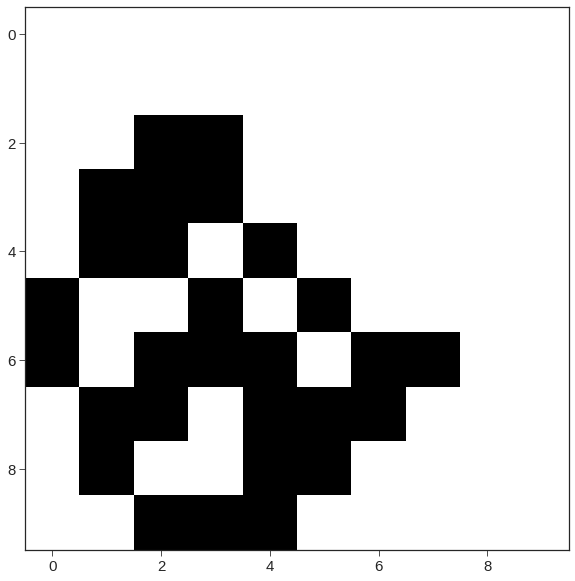

In [93]:
from IPython import display
arr = np.random.randint(2, size=(10, 10))
for i in range(10):    
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(arr)
    plt.show()
    arr = next_state(arr) 
    display.clear_output(wait=True)
    time.sleep(0.5)